In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, BatchNormalization, Add, Conv2DTranspose, LeakyReLU, add, ZeroPadding2D
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, ELU
from tensorflow.keras.models import load_model
import tensorflow.keras.backend as k
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from keras.applications.densenet import DenseNet201
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.activations import elu, relu
from tensorflow.keras.applications import DenseNet121

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#tf.compat.v1.disable_eager_execution()

In [ ]:
# download the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

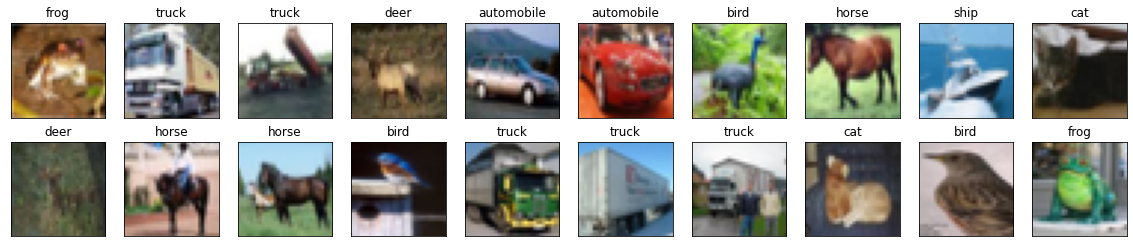

In [ ]:
# show some sample images
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  ax = plt.subplot(2, 10, idx + 1, xticks = ([]), yticks = ([]))
  plt.imshow(x_train[idx])
  plt.title(class_names[int(y_train[idx])])

In [ ]:
# change data type as float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
# normalize image data 
x_train = x_train / 255.
x_test = x_test / 255.

In [ ]:
# one hot encoding
# Now we one hot encode outputs
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
# shape o images
print('Shape of taining images: ', x_train.shape)
print('Shape of taining labels: ', y_train.shape)
print()
print('Shape of testing images: ', x_test.shape)
print('Shape of testing labels: ', y_test.shape)

Shape of taining images:  (50000, 32, 32, 3)
Shape of taining labels:  (50000, 10)

Shape of testing images:  (10000, 32, 32, 3)
Shape of testing labels:  (10000, 10)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
resnet_model = tf.keras.applications.vgg19.VGG19(weights = 'imagenet', input_shape = (32, 32, 3), include_top = False)

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
x = resnet_model.output
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(units = 512, activation = 'relu')(x)
x = Dropout(0.2)(x)
out = Dense(units = 10, activation = 'softmax')(x)

model = Model(resnet_model.input, out)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [ ]:
model_path = './drive/My Drive/PhD_Thesis/target_models/vgg16net.h5'
checkpoint = ModelCheckpoint(model_path, 
                             monitor= "val_loss", 
                             verbose=1, 
                             save_best_only=True, 
                             mode= "auto", 
                             save_weights_only = False)

early = EarlyStopping(monitor= "val_loss", 
                      mode= "auto", 
                      patience = 10)

callbacks_list = [checkpoint, early]

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train,
                      validation_data = (x_test, y_test),
                      epochs = 100, batch_size = 100, callbacks = callbacks_list)

Epoch 1/100
500/500 [==============================] - 32s 62ms/step - loss: 2.1082 - accuracy: 0.1688 - val_loss: 1.6994 - val_accuracy: 0.3115

Epoch 00001: val_loss improved from inf to 1.69940, saving model to ./drive/My Drive/PhD_Thesis/target_models/vgg16net.h5
Epoch 2/100
500/500 [==============================] - 31s 61ms/step - loss: 1.6697 - accuracy: 0.3198 - val_loss: 1.3890 - val_accuracy: 0.4412

Epoch 00002: val_loss improved from 1.69940 to 1.38903, saving model to ./drive/My Drive/PhD_Thesis/target_models/vgg16net.h5
Epoch 3/100
500/500 [==============================] - 30s 61ms/step - loss: 1.3754 - accuracy: 0.4782 - val_loss: 1.1999 - val_accuracy: 0.5751

Epoch 00003: val_loss improved from 1.38903 to 1.19992, saving model to ./drive/My Drive/PhD_Thesis/target_models/vgg16net.h5
Epoch 4/100
500/500 [==============================] - 31s 61ms/step - loss: 1.1642 - accuracy: 0.5957 - val_loss: 1.0457 - val_accuracy: 0.6570

Epoch 00004: val_loss improved from 1.1999

In [ ]:
model = load_model('./drive/My Drive/PhD_Thesis/target_models/vgg16net.h5')

In [ ]:
predictions = model.predict(x_test)
#np.argmax(predictions[0])

In [ ]:
orig_loss, orig_accuracy = model.evaluate(x_test[:1000], y_test[:1000])
print()
print('Test Accuracy: ', round(orig_accuracy, 4))
print('Test Los: ', round(orig_loss, 4))

32/32 [==============================] - 1s 17ms/step - loss: 0.6677 - accuracy: 0.7920

Test Accuracy:  0.792
Test Los:  0.6677


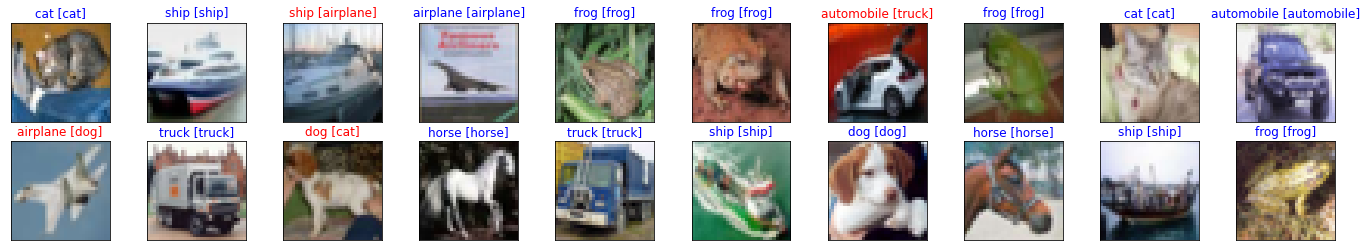

In [ ]:
#show some test images
fig = plt.figure(figsize=(24, 4))

for idx in range(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(x_test[idx])
  
  if class_names[int(np.argmax(predictions[idx]))] == class_names[np.argmax(y_test[idx])]:
    color = 'blue'
  else:
    color = 'red'
  
  plt.title(class_names[np.argmax(y_test[idx])] + " [" + class_names[int(np.argmax(predictions[idx]))] + "]", color = color)

# Fast Grdient Sign Method (FGSM)

In [ ]:
#!pip install foolbox
import foolbox
import eagerpy as ep

In [ ]:
pred = model.predict(x_test[:1000])

label = []
for i in range(len(pred)):
  y_pred = np.argmax(pred[i])
  l = label.append(y_pred) 


labels = np.asarray(label)

images = tf.cast(x_test[:1000], dtype = tf.float32)
labels = tf.cast(labels, dtype = tf.int32)

images = ep.astensor(images)
labels = ep.astensor(labels)

print(images.shape)
print(labels.shape)

(1000, 32, 32, 3)
(1000,)


In [ ]:
# create fool Model
fmodel = foolbox.models.TensorFlowModel(model = model, bounds = (0, 255))

# set criteria
c = foolbox.criteria.Misclassification(labels)

eps = [0.3]

# create attack
attack = foolbox.attacks.FGSM()

# create adversarial example
raw_adv, adv_img, success = attack(fmodel, images, criterion = c, epsilons = 0.01)

# adversarial purtubation
perturb = adv_img - x_test[:1000]

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


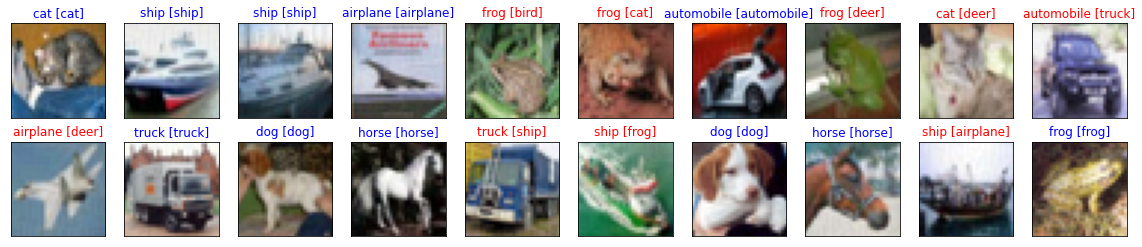

In [ ]:
adv_pred = model.predict(adv_img.numpy())
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  fig = plt.subplot(2, 10 , idx + 1, xticks = ([]), yticks = ([]))
  plt.imshow(np.clip(adv_img[idx].numpy(), 0, 1), cmap = 'gray')
  
  if class_names[int(np.argmax(adv_pred[idx]))] == class_names[np.argmax(y_test[idx])]:
    color = 'blue'
  else:
    color = 'red'
  
  plt.title(class_names[np.argmax(y_test[idx])] + " [" + class_names[int(np.argmax(adv_pred[idx]))] + "]", color = color)

In [ ]:
# accuracy and loss of model on adversarial images
adv_loss, adv_accuracy = model.evaluate(adv_img.numpy(), y_test[:1000])
print()
print("Model Accuracy on test images: ", round(adv_accuracy, 4))
print("Model Loss on test images: ", round(adv_loss, 4))

32/32 [==============================] - 0s 13ms/step - loss: 2.2358 - accuracy: 0.4690

Model Accuracy on test images:  0.469
Model Loss on test images:  2.2358


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load denoising model to remove FGSM putrbation
d_model = tf.keras.models.load_model('./drive/My Drive/PhD_Thesis/Generative_Models/cifar10/cifar10_fgsm.h5')

In [ ]:
# Restore adversarial images created due to FGSM attack 
denise_images =d_model.predict(adv_img.numpy())

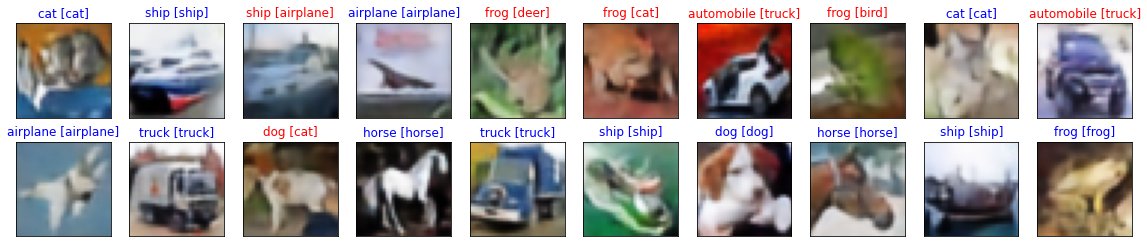

In [ ]:
# predict some restored images
predictions = model.predict(denise_images)

# show restored images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  #plt.imshow(denise_images[idx].reshape(28, 28), cmap = 'gray')
  
  if class_names[np.argmax(y_test[idx])] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(denise_images[idx], cmap = 'gray')
  plt.title(class_names[np.argmax(y_test[idx])] + ' [' + class_names[np.argmax(predictions[idx])] + ']', color =  color)
  

In [ ]:
# accuracy and loss of model on restored images
rest_loss, rest_accuracy = model.evaluate(denise_images, y_test[:1000])
print()
print("Model Accuracy on restored images: ", round(rest_accuracy, 4))
print("Model Loss on test images: ", round(rest_loss, 4))

32/32 [==============================] - 0s 12ms/step - loss: 0.9890 - accuracy: 0.7020

Model Accuracy on restored images:  0.702
Model Loss on test images:  0.989


In [ ]:
print('Sucess of Defence Model: ', round(rest_accuracy / orig_accuracy, 4))

Sucess of Defence Model:  0.8864


# Basic Iterative Method (BIM)

In [ ]:
#!pip install foolbox
import foolbox
import eagerpy as ep

In [ ]:
pred = model.predict(x_test[:1000])

label = []
for i in range(len(pred)):
  y_pred = np.argmax(pred[i])
  l = label.append(y_pred) 


labels = np.asarray(label)

images = tf.cast(x_test[:1000], dtype = tf.float32)
labels = tf.cast(labels, dtype = tf.int32)

images = ep.astensor(images)
labels = ep.astensor(labels)

print(images.shape)
print(labels.shape)

(1000, 32, 32, 3)
(1000,)


In [ ]:
# create fool Model
fmodel = foolbox.models.TensorFlowModel(model = model, bounds = (0, 255))

# set criteria
c = foolbox.criteria.Misclassification(labels)

# create attack
attack = foolbox.attacks.L2BasicIterativeAttack()

# create adversarial example
raw_adv, adv_img, success = attack(fmodel, images, criterion = c, epsilons = 0.2)

# adversarial purtubation
perturb = adv_img - x_test[:1000]

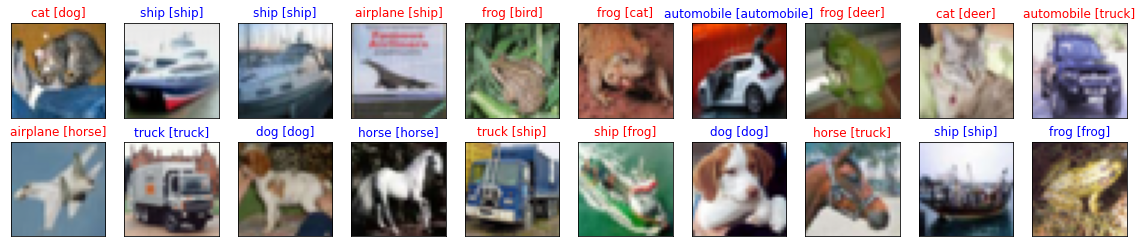

In [ ]:
adv_pred = model.predict(adv_img.numpy())
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  fig = plt.subplot(2, 10 , idx + 1, xticks = ([]), yticks = ([]))
  plt.imshow(np.clip(adv_img[idx].numpy(), 0, 1), cmap = 'gray')
  
  if class_names[int(np.argmax(adv_pred[idx]))] == class_names[np.argmax(y_test[idx])]:
    color = 'blue'
  else:
    color = 'red'
  
  plt.title(class_names[np.argmax(y_test[idx])] + " [" + class_names[int(np.argmax(adv_pred[idx]))] + "]", color = color)

In [ ]:
# accuracy and loss of model on adversarial images
adv_loss, adv_accuracy = model.evaluate(adv_img.numpy(), y_test[:1000])
print()
print("Model Accuracy on test images: ", round(adv_accuracy, 4))
print("Model Loss on test images: ", round(adv_loss, 4))

32/32 [==============================] - 0s 13ms/step - loss: 2.8432 - accuracy: 0.4570

Model Accuracy on test images:  0.457
Model Loss on test images:  2.8432


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load denoising model to remove FGSM putrbation
d_model = tf.keras.models.load_model('./drive/My Drive/PhD_Thesis/Generative_Models/cifar10/cifar10_bim.h5')

In [ ]:
# Restore adversarial images created due to FGSM attack 
denise_images =d_model.predict(adv_img.numpy())

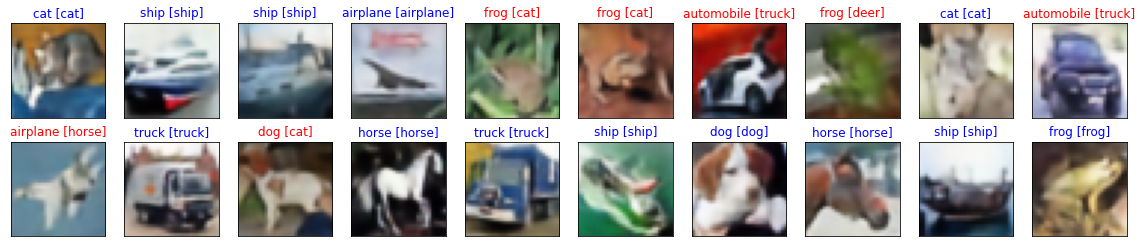

In [ ]:
# predict some restored images
predictions = model.predict(denise_images)

# show restored images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  #plt.imshow(denise_images[idx].reshape(28, 28), cmap = 'gray')
  
  if class_names[np.argmax(y_test[idx])] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(denise_images[idx], cmap = 'gray')
  plt.title(class_names[np.argmax(y_test[idx])] + ' [' + class_names[np.argmax(predictions[idx])] + ']', color =  color)
  

In [ ]:
# accuracy and loss of model on restored images
rest_loss, rest_accuracy = model.evaluate(denise_images, y_test[:1000])
print()
print("Model Accuracy on restored images: ", round(rest_accuracy, 4))
print("Model Loss on test images: ", round(rest_loss, 4))

32/32 [==============================] - 0s 12ms/step - loss: 0.9525 - accuracy: 0.7080

Model Accuracy on restored images:  0.708
Model Loss on test images:  0.9525


In [ ]:
print('Sucess of Defence Model: ', round(rest_accuracy / orig_accuracy, 4))

Sucess of Defence Model:  0.8939


# Projected Gradient Descent (PGD)

In [ ]:
#!pip install foolbox
import foolbox
import eagerpy as ep

In [ ]:
pred = model.predict(x_test[:1000])

label = []
for i in range(len(pred)):
  y_pred = np.argmax(pred[i])
  l = label.append(y_pred) 


labels = np.asarray(label)

images = tf.cast(x_test[:1000], dtype = tf.float32)
labels = tf.cast(labels, dtype = tf.int32)

images = ep.astensor(images)
labels = ep.astensor(labels)

print(images.shape)
print(labels.shape)

(1000, 32, 32, 3)
(1000,)


In [ ]:
# create fool Model
fmodel = foolbox.models.TensorFlowModel(model = model, bounds = (0, 255))

# set criteria
c = foolbox.criteria.Misclassification(labels)

# create attack
attack = foolbox.attacks.PGD()

# create adversarial example
raw_adv, adv_img, success = attack(fmodel, images, criterion = c, epsilons = 0.01)

# adversarial purtubation
perturb = adv_img - x_test[:1000]

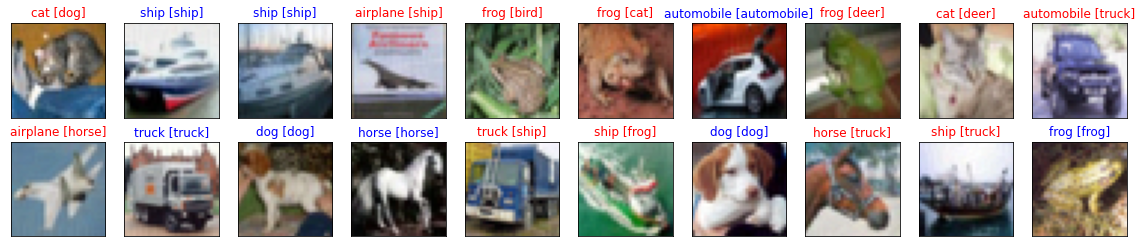

In [ ]:
adv_pred = model.predict(adv_img.numpy())
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  fig = plt.subplot(2, 10 , idx + 1, xticks = ([]), yticks = ([]))
  plt.imshow(np.clip(adv_img[idx].numpy(), 0, 1), cmap = 'gray')
  
  if class_names[int(np.argmax(adv_pred[idx]))] == class_names[np.argmax(y_test[idx])]:
    color = 'blue'
  else:
    color = 'red'
  
  plt.title(class_names[np.argmax(y_test[idx])] + " [" + class_names[int(np.argmax(adv_pred[idx]))] + "]", color = color)

In [ ]:
# accuracy and loss of model on adversarial images
adv_loss, adv_accuracy = model.evaluate(adv_img.numpy(), y_test[:1000])
print()
print("Model Accuracy on test images: ", round(adv_accuracy, 4))
print("Model Loss on test images: ", round(adv_loss, 4))

32/32 [==============================] - 0s 13ms/step - loss: 4.3391 - accuracy: 0.3820

Model Accuracy on test images:  0.382
Model Loss on test images:  4.3391


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load denoising model to remove FGSM putrbation
d_model = tf.keras.models.load_model('./drive/My Drive/PhD_Thesis/Generative_Models/cifar10/cifar10_pgd.h5')

In [ ]:
# Restore adversarial images created due to FGSM attack 
denise_images =d_model.predict(adv_img.numpy())

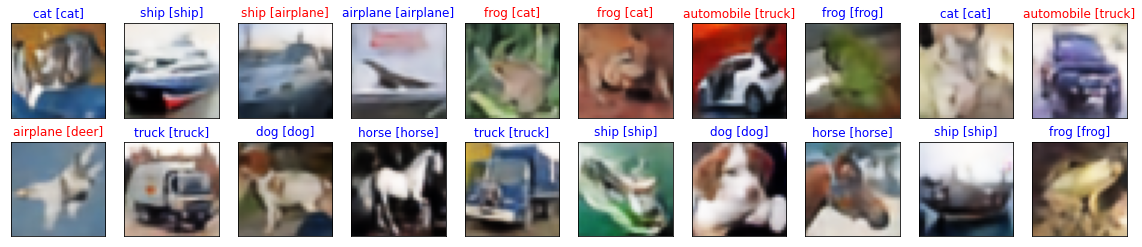

In [ ]:
# predict some restored images
predictions = model.predict(denise_images)

# show restored images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  #plt.imshow(denise_images[idx].reshape(28, 28), cmap = 'gray')
  
  if class_names[np.argmax(y_test[idx])] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(denise_images[idx], cmap = 'gray')
  plt.title(class_names[np.argmax(y_test[idx])] + ' [' + class_names[np.argmax(predictions[idx])] + ']', color =  color)
  

In [ ]:
# accuracy and loss of model on restored images
rest_loss, rest_accuracy = model.evaluate(denise_images, y_test[:1000])
print()
print("Model Accuracy on restored images: ", round(rest_accuracy, 4))
print("Model Loss on test images: ", round(rest_loss, 4))

32/32 [==============================] - 0s 13ms/step - loss: 0.9289 - accuracy: 0.7050

Model Accuracy on restored images:  0.705
Model Loss on test images:  0.9289


In [ ]:
print('Sucess of Defence Model: ', round(rest_accuracy / orig_accuracy, 4))

Sucess of Defence Model:  0.8902


# Deep Fool Attack

In [ ]:
#!pip install foolbox
import foolbox
import eagerpy as ep

In [ ]:
pred = model.predict(x_test[:1000])

label = []
for i in range(len(pred)):
  y_pred = np.argmax(pred[i])
  l = label.append(y_pred) 


labels = np.asarray(label)

images = tf.cast(x_test[:1000], dtype = tf.float32)
labels = tf.cast(labels, dtype = tf.int32)

images = ep.astensor(images)
labels = ep.astensor(labels)

print(images.shape)
print(labels.shape)

(1000, 32, 32, 3)
(1000,)


In [ ]:
# create fool Model
fmodel = foolbox.models.TensorFlowModel(model = model, bounds = (0, 255))

# set criteria
c = foolbox.criteria.Misclassification(labels)

# create attack
attack = foolbox.attacks.L2DeepFoolAttack()

# create adversarial example
raw_adv, adv_img, success = attack(fmodel, images, criterion = c, epsilons = 0.2)

# adversarial purtubation
perturb = adv_img - x_test[:1000]

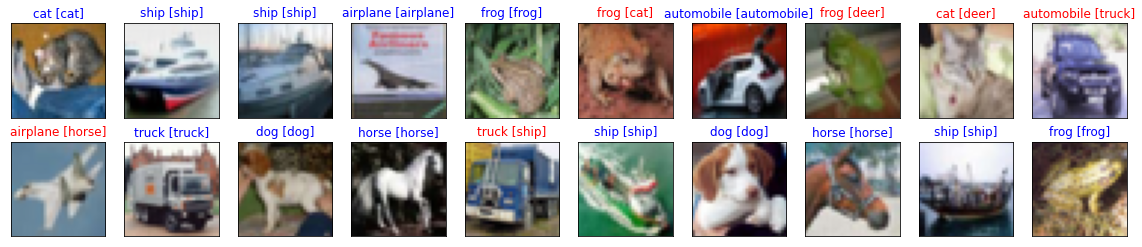

In [ ]:
adv_pred = model.predict(adv_img.numpy())
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  fig = plt.subplot(2, 10 , idx + 1, xticks = ([]), yticks = ([]))
  plt.imshow(np.clip(adv_img[idx].numpy(), 0, 1), cmap = 'gray')
  
  if class_names[int(np.argmax(adv_pred[idx]))] == class_names[np.argmax(y_test[idx])]:
    color = 'blue'
  else:
    color = 'red'
  
  plt.title(class_names[np.argmax(y_test[idx])] + " [" + class_names[int(np.argmax(adv_pred[idx]))] + "]", color = color)

In [ ]:
# accuracy and loss of model on adversarial images
adv_loss, adv_accuracy = model.evaluate(adv_img.numpy(), y_test[:1000])
print()
print("Model Accuracy on test images: ", round(adv_accuracy, 4))
print("Model Loss on test images: ", round(adv_loss, 4))

32/32 [==============================] - 0s 12ms/step - loss: 0.9710 - accuracy: 0.6020

Model Accuracy on test images:  0.602
Model Loss on test images:  0.971


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load denoising model to remove FGSM putrbation
d_model = tf.keras.models.load_model('./drive/My Drive/PhD_Thesis/Generative_Models/cifar10/cifar10_dfa.h5')

In [ ]:
# Restore adversarial images created due to FGSM attack 
denise_images =d_model.predict(adv_img.numpy())

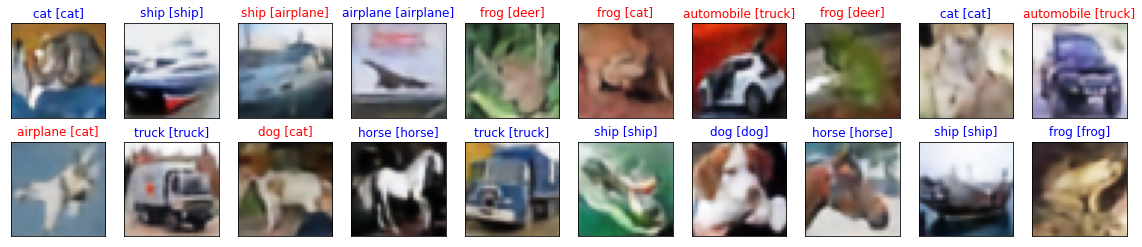

In [ ]:
# predict some restored images
predictions = model.predict(denise_images)

# show restored images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  #plt.imshow(denise_images[idx].reshape(28, 28), cmap = 'gray')
  
  if class_names[np.argmax(y_test[idx])] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(denise_images[idx], cmap = 'gray')
  plt.title(class_names[np.argmax(y_test[idx])] + ' [' + class_names[np.argmax(predictions[idx])] + ']', color =  color)
  

In [ ]:
# accuracy and loss of model on restored images
rest_loss, rest_accuracy = model.evaluate(denise_images, y_test[:1000])
print()
print("Model Accuracy on restored images: ", round(rest_accuracy, 4))
print("Model Loss on test images: ", round(rest_loss, 4))

32/32 [==============================] - 0s 13ms/step - loss: 0.9297 - accuracy: 0.7030

Model Accuracy on restored images:  0.703
Model Loss on test images:  0.9297


In [ ]:
print('Sucess of Defence Model: ', round(rest_accuracy / orig_accuracy, 4))

Sucess of Defence Model:  0.8876


# Carlini and Wanger Attack

In [ ]:
#!pip install foolbox
import foolbox
import eagerpy as ep

In [ ]:
pred = model.predict(x_test[:1000])

label = []
for i in range(len(pred)):
  y_pred = np.argmax(pred[i])
  l = label.append(y_pred) 


labels = np.asarray(label)

images = tf.cast(x_test[:1000], dtype = tf.float32)
labels = tf.cast(labels, dtype = tf.int32)

images = ep.astensor(images)
labels = ep.astensor(labels)

print(images.shape)
print(labels.shape)

(1000, 32, 32, 3)
(1000,)


In [ ]:
# create fool Model
fmodel = foolbox.models.TensorFlowModel(model = model, bounds = (0, 255))

# set criteria
c = foolbox.criteria.Misclassification(labels)

# create attack
attack = foolbox.attacks.L2CarliniWagnerAttack()

# create adversarial example
raw_adv, adv_img, success = attack(fmodel, images, criterion = c, epsilons = 5)

# adversarial purtubation
perturb = adv_img - x_test[:1000]

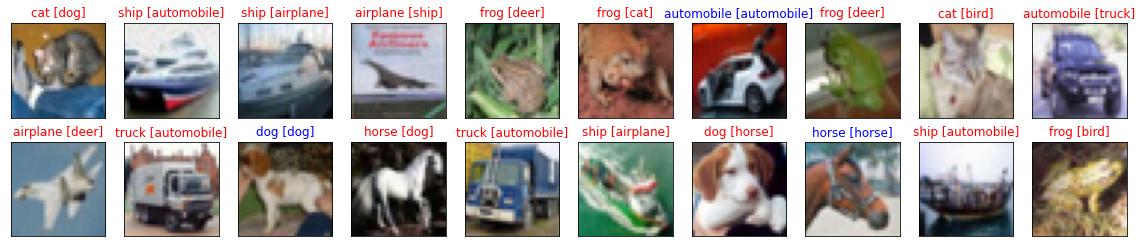

In [ ]:
adv_pred = model.predict(adv_img.numpy())
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  fig = plt.subplot(2, 10 , idx + 1, xticks = ([]), yticks = ([]))
  plt.imshow(np.clip(adv_img[idx].numpy(), 0, 1), cmap = 'gray')
  
  if class_names[int(np.argmax(adv_pred[idx]))] == class_names[np.argmax(y_test[idx])]:
    color = 'blue'
  else:
    color = 'red'
  
  plt.title(class_names[np.argmax(y_test[idx])] + " [" + class_names[int(np.argmax(adv_pred[idx]))] + "]", color = color)

In [ ]:
# accuracy and loss of model on adversarial images
adv_loss, adv_accuracy = model.evaluate(adv_img.numpy(), y_test[:1000])
print()
print("Model Accuracy on test images: ", round(adv_accuracy, 4))
print("Model Loss on test images: ", round(adv_loss, 4))

32/32 [==============================] - 0s 13ms/step - loss: 1.1845 - accuracy: 0.1450

Model Accuracy on test images:  0.145
Model Loss on test images:  1.1845


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load denoising model to remove FGSM putrbation
d_model = tf.keras.models.load_model('./drive/My Drive/PhD_Thesis/Generative_Models/cifar10/cifar10_cwa.h5')

In [ ]:
# Restore adversarial images created due to FGSM attack 
denise_images =d_model.predict(adv_img.numpy())

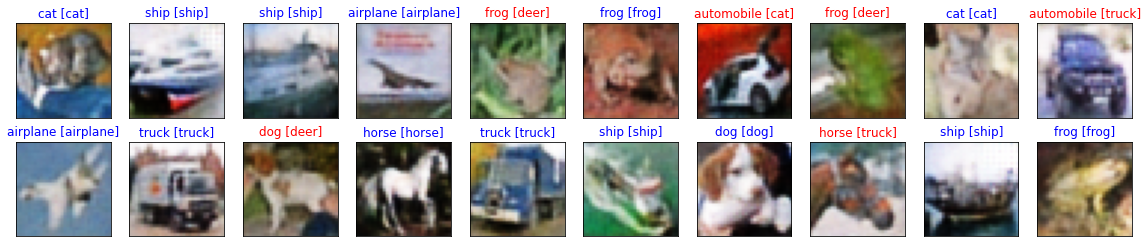

In [ ]:
# predict some restored images
predictions = model.predict(denise_images)

# show restored images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  #plt.imshow(denise_images[idx].reshape(28, 28), cmap = 'gray')
  
  if class_names[np.argmax(y_test[idx])] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(denise_images[idx], cmap = 'gray')
  plt.title(class_names[np.argmax(y_test[idx])] + ' [' + class_names[np.argmax(predictions[idx])] + ']', color =  color)
  

In [ ]:
# accuracy and loss of model on restored images
rest_loss, rest_accuracy = model.evaluate(denise_images, y_test[:1000])
print()
print("Model Accuracy on restored images: ", round(rest_accuracy, 4))
print("Model Loss on test images: ", round(rest_loss, 4))

32/32 [==============================] - 0s 13ms/step - loss: 0.8965 - accuracy: 0.7150

Model Accuracy on restored images:  0.715
Model Loss on test images:  0.8965


In [ ]:
print('Sucess of Defence Model: ', round(rest_accuracy / orig_accuracy, 4))

Sucess of Defence Model:  0.9458


# Spatial Attack

In [ ]:
#!pip install foolbox
import foolbox
import eagerpy as ep

In [ ]:
pred = model.predict(x_test[:1000])

label = []
for i in range(len(pred)):
  y_pred = np.argmax(pred[i])
  l = label.append(y_pred) 


labels = np.asarray(label)

images = tf.cast(x_test[:1000], dtype = tf.float32)
labels = tf.cast(labels, dtype = tf.int32)

images = ep.astensor(images)
labels = ep.astensor(labels)

print(images.shape)
print(labels.shape)

(1000, 32, 32, 3)
(1000,)


In [ ]:
# create fool Model
fmodel = foolbox.models.TensorFlowModel(model = model, bounds = (0, 255))

# set criteria
c = foolbox.criteria.Misclassification(labels)

# create attack
attack = foolbox.attacks.SpatialAttack()

# create adversarial example
raw_adv, adv_img, success = attack(fmodel, images, criterion = c)

# adversarial purtubation
perturb = adv_img - x_test[:1000]

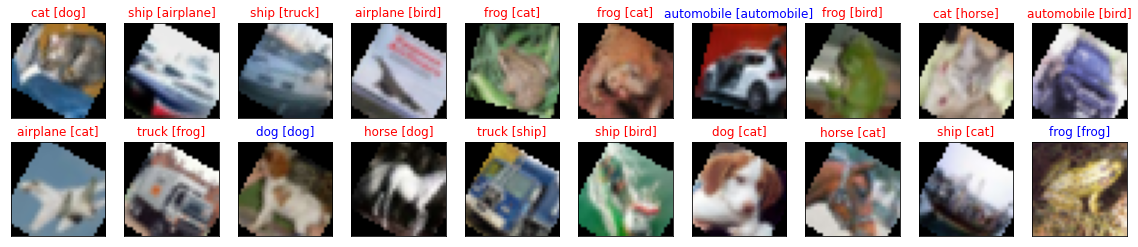

In [ ]:
adv_pred = model.predict(adv_img.numpy())
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  fig = plt.subplot(2, 10 , idx + 1, xticks = ([]), yticks = ([]))
  plt.imshow(np.clip(adv_img[idx].numpy(), 0, 1), cmap = 'gray')
  
  if class_names[int(np.argmax(adv_pred[idx]))] == class_names[np.argmax(y_test[idx])]:
    color = 'blue'
  else:
    color = 'red'
  
  plt.title(class_names[np.argmax(y_test[idx])] + " [" + class_names[int(np.argmax(adv_pred[idx]))] + "]", color = color)

In [ ]:
# accuracy and loss of model on adversarial images
adv_loss, adv_accuracy = model.evaluate(adv_img.numpy(), y_test[:1000])
print()
print("Model Accuracy on test images: ", round(adv_accuracy, 4))
print("Model Loss on test images: ", round(adv_loss, 4))

32/32 [==============================] - 0s 12ms/step - loss: 3.1822 - accuracy: 0.0850

Model Accuracy on test images:  0.085
Model Loss on test images:  3.1822


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load denoising model to remove FGSM putrbation
d_model = tf.keras.models.load_model('./drive/My Drive/PhD_Thesis/Generative_Models/cifar10/cifar10_spa.h5')

In [ ]:
# Restore adversarial images created due to FGSM attack 
denise_images =d_model.predict(adv_img.numpy())

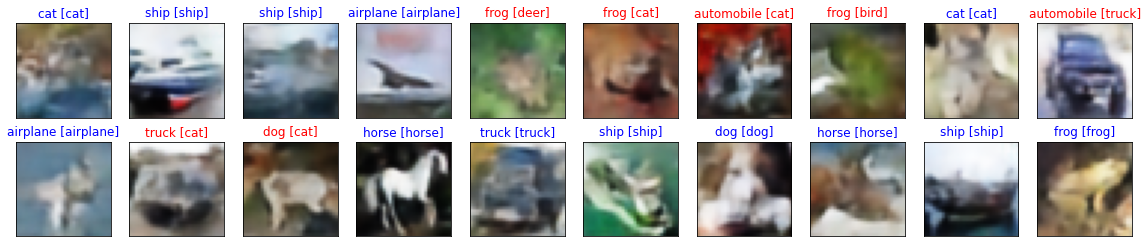

In [ ]:
# predict some restored images
predictions = model.predict(denise_images)

# show restored images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  #plt.imshow(denise_images[idx].reshape(28, 28), cmap = 'gray')
  
  if class_names[np.argmax(y_test[idx])] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(denise_images[idx], cmap = 'gray')
  plt.title(class_names[np.argmax(y_test[idx])] + ' [' + class_names[np.argmax(predictions[idx])] + ']', color =  color)
  

In [ ]:
# accuracy and loss of model on restored images
rest_loss, rest_accuracy = model.evaluate(denise_images, y_test[:1000])
print()
print("Model Accuracy on restored images: ", round(rest_accuracy, 4))
print("Model Loss on test images: ", round(rest_loss, 4))

32/32 [==============================] - 0s 13ms/step - loss: 1.6404 - accuracy: 0.5140

Model Accuracy on restored images:  0.514
Model Loss on test images:  1.6404


In [ ]:
print('Sucess of Defence Model: ', round(rest_accuracy / orig_accuracy, 4))

Sucess of Defence Model:  0.649
